In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data1=pd.read_csv('../input/titanic/train.csv')
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data1.shape

(891, 12)

In [3]:
print(data1.isna().sum())
data1.drop('Cabin',axis=1,inplace=True)

print('\n\npost drop and missing values impute\n\n')
data1['Age'].fillna(np.percentile(data1[data1['Age'].isna()==False]['Age'],50),inplace=True)
print(data1.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


post drop and missing values impute


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


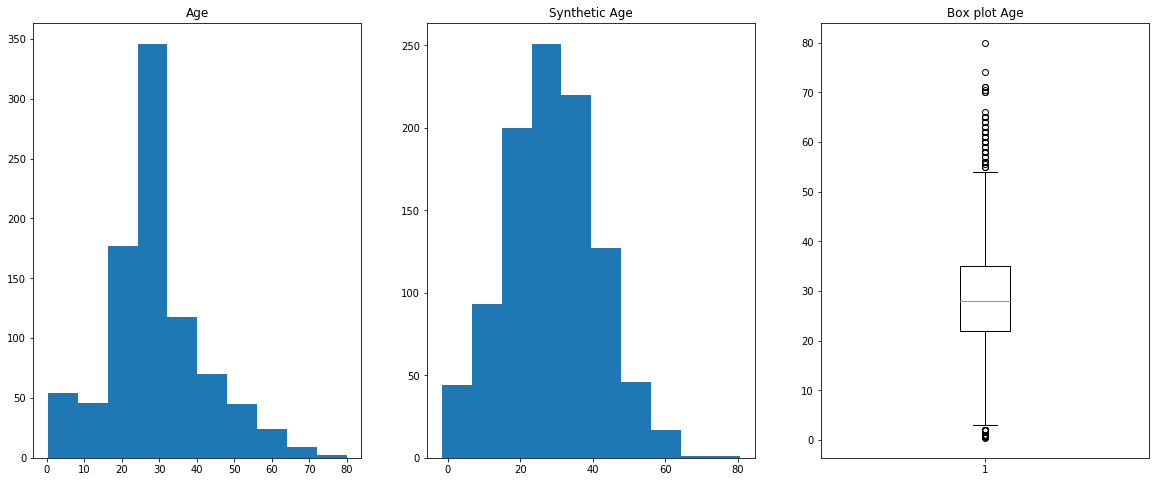

In [4]:

fig, (ax1,ax2,ax3)=plt.subplots(1,3, figsize=(20,8))
fig="Density And Box Plot"
ax1.hist(data1['Age'])
ax1.title.set_text('Age')
synthetic_age=np.random.normal(29.361582,13.019697,(1000,))
ax2.hist(synthetic_age)
#it demonstrtates the concept given mean and standard deviation and other moments, it is possible to synthetically model any dataset
ax2.title.set_text('Synthetic Age')
ax3.boxplot(data1['Age'])
ax3.title.set_text('Box plot Age') #box plot has outliers

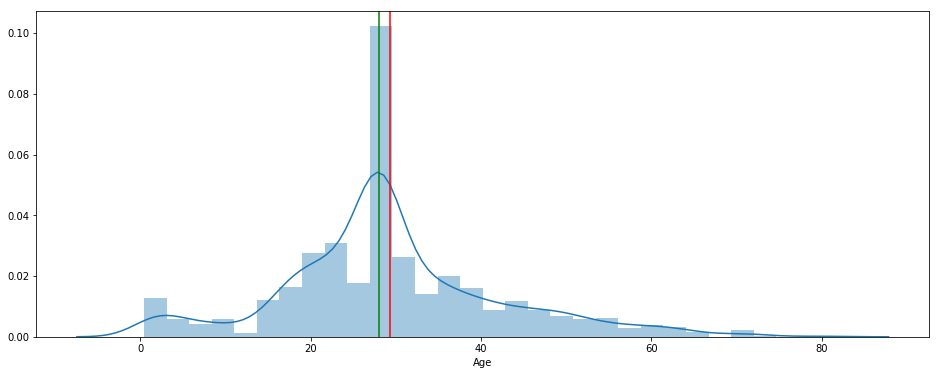

In [5]:
from scipy.stats import mode
plt.subplots(figsize=(16,6))
sns.distplot(data1['Age'])
plt.axvline(np.mean(data1['Age']), color='r')
plt.axvline(np.median(data1['Age']), color='g')

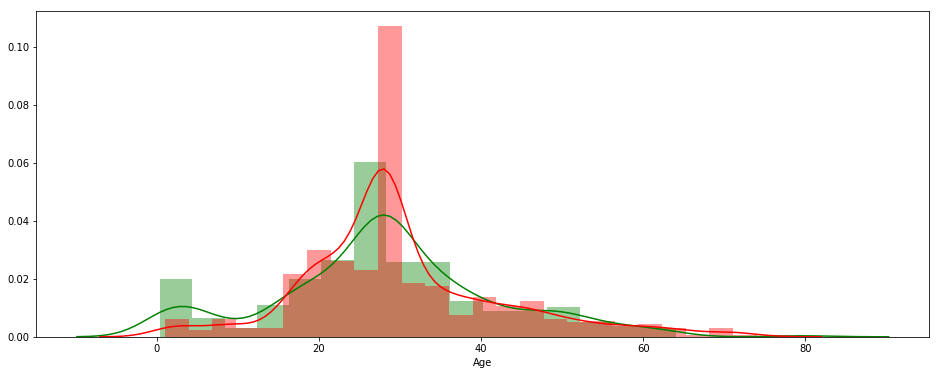

In [6]:
plt.subplots(figsize=(16,6))
sns.distplot(data1[data1['Survived']==1]['Age'], label='Survived', color='g', hist=True, norm_hist=False)
sns.distplot(data1[data1['Survived']==0]['Age'], label="Didn't Survive", color='r', hist=True, norm_hist=False)
#Higher age datapoints didn't survive. Spike in non survivability around 30 years. Overall Age is not adding much value

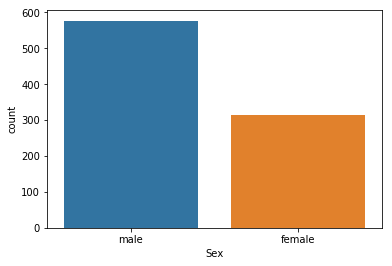

In [7]:
sns.countplot(x=data1['Sex'])

In [8]:
data1['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
q1=np.percentile(data1['Age'],25)
q3=np.percentile(data1['Age'],75)
lower_range=q1-1.5*(q3-q1)
upper_range=q3+1.5*(q3-q1)
# def clip_outlier(x):
#     if x>int(upper_range):
#         return upper_range
#     elif x<lower_range:
#         return lower_range
    
    
# data1['Age']=data1['Age'].map(clip_outlier)

In [10]:
# from scipy.stats import mode
# plt.subplots(figsize=(16,6))
# sns.distplot(data1['Age'])
# plt.axvline(np.mean(data1['Age']), color='r')
# plt.axvline(np.median(data1['Age']), color='g')

array([[1.        , 0.09668842],
       [0.09668842, 1.        ]])

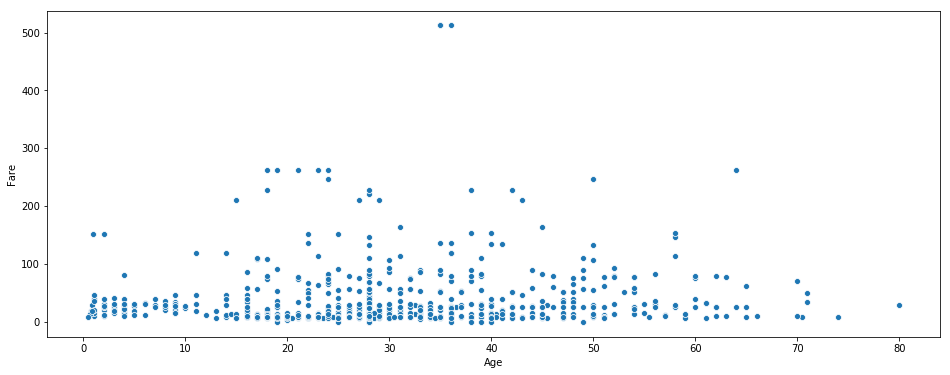

In [11]:
plt.subplots(figsize=(16,6))
sns.scatterplot(x=data1['Age'],y=data1['Fare'])
np.corrcoef(data1['Age'],data1['Fare'])

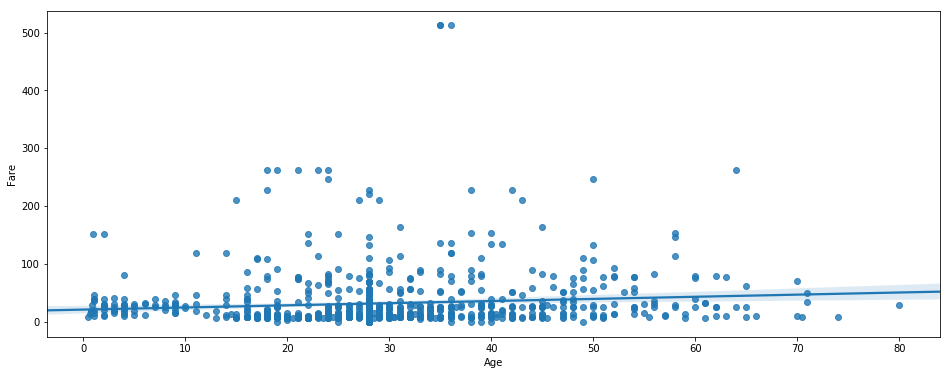

In [12]:
plt.subplots(figsize=(16,6))
sns.regplot(x=data1['Age'],y=data1['Fare'])

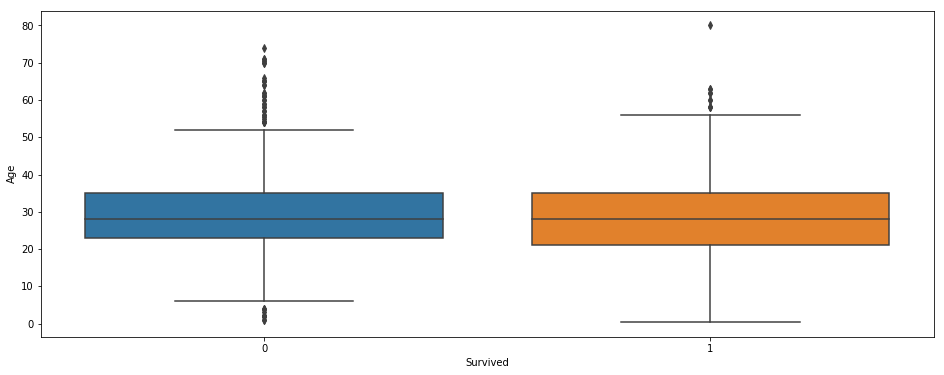

In [13]:
plt.subplots(figsize=(16,6))
sns.boxplot(y=data1['Age'],x=data1['Survived']) # what you are looking for is that the box plots should in the parameters like- mean, median, quartiles, distribution
#if the distribution is exactly same for the classes, then the variable probably is not of much of use

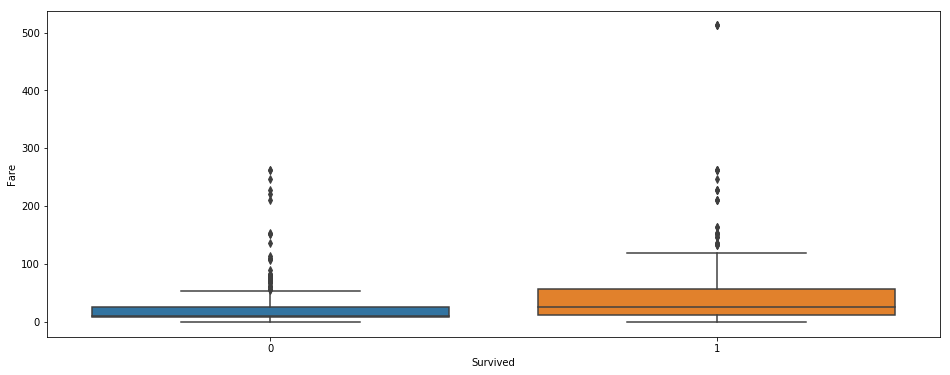

In [14]:
plt.subplots(figsize=(16,6))
sns.boxplot(y=data1['Fare'],x=data1['Survived'])

In [15]:
from scipy.stats import chi2_contingency
chi2_contingency(data1['Sex'],data1['Survived'])

TypeError: '<' not supported between instances of 'str' and 'int'

**Chi-Square Analysis**

In [16]:

#calculated chi-square value greater than critical, reject the null hypothesis. 
#Higher the chi-square value- more confident it is in rejecting the null hypothesis- meaning featues are depednet

#if a feature is independent to the target, it is uninformative for classifying observations

#H0- Features (categorcal Variables) are independent
#H1- features are not independent

print(pd.crosstab(data1['Sex'],data1['Survived']))
chi2_contingency(pd.crosstab(data1['Sex'],data1['Survived'])) #returns chi2, p value, dof, expected grid
#Sex is an important features in terms of predciting survivability

Survived    0    1
Sex               
female     81  233
male      468  109


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [17]:
print (pd.crosstab(data1['Pclass'],data1['Survived']))
chi2_contingency(pd.crosstab(data1['Pclass'],data1['Survived'])) #returns chi2, p value, dof, expected grid
#PClass is an important features in terms of predciting survivability.But the Value is less than SEx

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

Chi-square can also be used in binning. We are aware of the idea that higher the Chi-square is better. if the Chisquare for the analysis done against A Target variable
for a variable P is increasing, then more no. of bins are desired for the variable P

In [18]:
data1['age_bin']=pd.DataFrame(pd.cut(data1['Age'],bins=[0,30,60],right=True,retbins=False,include_lowest=True, labels=[1,2]))
print (pd.crosstab(data1['age_bin'],data1['Survived']))

chi2_contingency(pd.crosstab(data1['age_bin'],data1['Survived']))

Survived    0    1
age_bin           
1.0       368  218
2.0       164  119


(1.6906345229827406,
 0.1935173462016517,
 1,
 array([[358.74798619, 227.25201381],
        [173.25201381, 109.74798619]]))

In [19]:
data1['age_bin_l']=pd.DataFrame(pd.cut(data1['Age'],bins=[0,10,20,30,40,50,60,70,80],right=True,retbins=False,include_lowest=True, labels=[1,2,3,4,5,6,7,8]))
print (pd.crosstab(data1['age_bin_l'],data1['Survived']))
chi2_contingency(pd.crosstab(data1['age_bin_l'],data1['Survived']))

#having 8 bins for age is better than having 2 bins for age, as the chi-square is value increasing

Survived     0    1
age_bin_l          
1           26   38
2           71   44
3          271  136
4           86   69
5           53   33
6           25   17
7           13    4
8            4    1


(21.01558225647956,
 0.003747155927465783,
 7,
 array([[ 39.43434343,  24.56565657],
        [ 70.85858586,  44.14141414],
        [250.77777778, 156.22222222],
        [ 95.50505051,  59.49494949],
        [ 52.98989899,  33.01010101],
        [ 25.87878788,  16.12121212],
        [ 10.47474747,   6.52525253],
        [  3.08080808,   1.91919192]]))

In [20]:
from scipy.stats import f_oneway
#H0- mean is same for all groups
#H1- means is not same for all groups


print (f_oneway(data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']))
#we can reject the null hypothesis. But the Criteria is slightly weak, which means that Age is slightly weak varable in terms of predicting Survivavility, which is also 
#inline with density plot. Regins of non-overlap were less

F_onewayResult(statistic=3.7615280468804575, pvalue=0.052760688475835)


In [21]:
f_oneway(data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare'])
#Reject the null hypothesis

F_onewayResult(statistic=63.03076422804448, pvalue=6.120189341921873e-15)